In [1]:
%matplotlib inline

from lib import (
    PrefixExperimentLogParser,
    PrefixDriverWithExperimentLogParser,
    ExperimentLogPlotter,
    ExperimentDoubleLogPlotter,
    ExperimentLogPlotter,
)
from config import *

import numpy as np
import matplotlib.pyplot as plt

In [6]:
parser_spark = PrefixExperimentLogParser(
    prefix="EXPERIMENT|", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)
parser_local = PrefixExperimentLogParser(
    prefix="EXPERIMENT|", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)
parser_fw = PrefixExperimentLogParser(
    prefix="EXPERIMENT|", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)
parser_fw_2 = PrefixDriverWithExperimentLogParser(
    prefix="EXPERIMENT|", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)

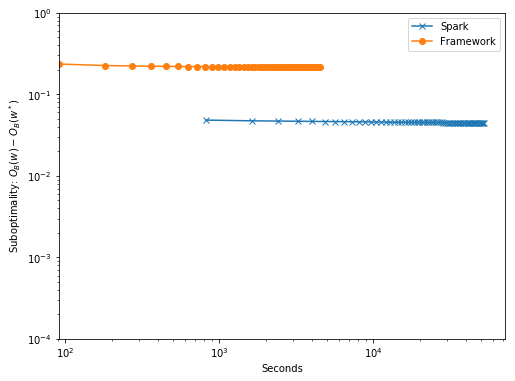

In [9]:
plotter = ExperimentLogPlotter()
plotter.add_experiment(parser_spark.parse(input_path_url_spark), "Spark", every_n=100)
plotter.add_experiment(
    parser_fw.parse(input_path_url_exa, no_params=True), "Framework", every_n=100
)
plotter.ylabel(r"Suboptimality: $O_B(w) - O_B(w^*)$")
plotter.ylim(1e-4)
plotter.plot()

In [11]:
plotter = ExperimentDoubleLogPlotter()
plotter.add_experiment(parser_local.parse(input_path_local), name="Local", every_n=20)
plotter.add_experiment(parser_spark.parse(input_path_spark), name="Spark", every_n=50)
plotter.add_experiment(
    parser_fw.parse(input_path_exa, no_params=True), name="Framework", every_n=100
)
plotter.add_experiment(
    parser_fw_2.parse(input_path_exa_driver_2, input_path_exa_2),
    subplot=2,
    name="Framework SSP=3, H=0.1",
    every_n=100,
)
plotter.add_experiment(
    parser_fw_2.parse(input_path_exa_driver_3, input_path_exa_3),
    subplot=2,
    name="Framework SSP=3, H=0.05",
    every_n=100,
)
plotter.ylabel(r"Suboptimality: $O_B(w) - O_B(w^*)$")
plotter.ylim(1e-4)
plotter.figsize((14, 6))
plotter.title("Epsilon - Suboptimality vs. Time", subplot=1)
plotter.title("URL - Suboptimality vs. Time", subplot=2)
plotter.plot()

KeyError: 1

# Experiments

## Algorithm Performance

In [13]:
parser_spark = PrefixExperimentLogParser(
    prefix="EXPERIMENT|", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)
parser_local = PrefixExperimentLogParser(
    prefix="", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)
parser_local_2 = PrefixExperimentLogParser(
    prefix="EXPERIMENT|", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)
parser_framework = PrefixDriverWithExperimentLogParser(
    prefix="EXPERIMENT|", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)
parser_framework_2 = PrefixExperimentLogParser(
    prefix="EXPERIMENT|", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)
parser_framework_driver = PrefixDriverWithExperimentLogParser(
    prefix="EXPERIMENT|", parameters=["eta", "lambda", "localIterFrac", "numSplits"]
)

### Figure

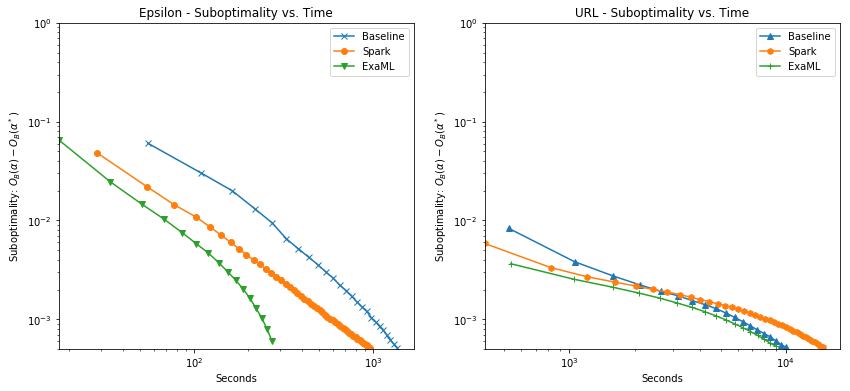

In [17]:
plotter = ExperimentDoubleLogPlotter()
# Epsilon
plotter.add_experiment(
    parser_local.parse(alg_epsilon_local_path), subplot=1, name="Baseline", every_n=1
)
plotter.add_experiment(
    parser_spark.parse(alg_epsilon_spark_path), subplot=1, name="Spark", every_n=5
)
plotter.add_experiment(
    parser_framework_2.parse(alg_epsilon_framework_path, no_params=True),
    subplot=1,
    name="ExaML",
    every_n=5,
)
# URL
plotter.add_experiment(
    parser_local_2.parse(alg_url_local_path), subplot=2, name="Baseline", every_n=10
)
plotter.add_experiment(
    parser_spark.parse(alg_url_spark_path), subplot=2, name="Spark", every_n=50
)
plotter.add_experiment(
    parser_framework_2.parse(alg_url_framework_path, no_params=True),
    subplot=2,
    name="ExaML",
    every_n=100,
)

plotter.ylabel(r"Suboptimality: $O_B(\alpha) - O_B(\alpha^*)$")
plotter.ylim(5e-4)
plotter.figsize((14, 6))
plotter.title("Epsilon - Suboptimality vs. Time", subplot=1)
plotter.title("URL - Suboptimality vs. Time", subplot=2)
# plotter.use_iterations()

plotter.add_min_objectives(objective=0.21720414, subplot=1)
plotter.add_min_objectives(objective=0.045041505, subplot=2)

plotter.plot(
    filename="./../img/overall_perf_cmp.png",
)

## Communication Frequency

### Figure

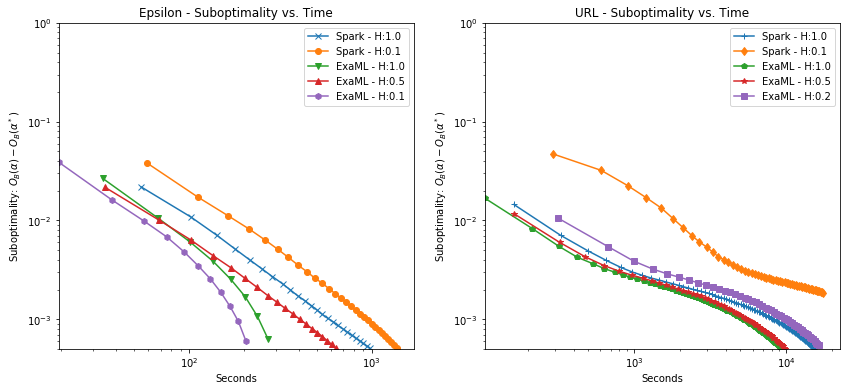

In [21]:
plotter = ExperimentDoubleLogPlotter()
# Epsilon
plotter.add_experiment(
    parser_spark.parse(comm_epsilon_spark_h1_path),
    subplot=1,
    name="Spark - H:1.0",
    every_n=10,
)
plotter.add_experiment(
    parser_spark.parse(comm_epsilon_spark_h01_path),
    subplot=1,
    name="Spark - H:0.1",
    every_n=50,
)
plotter.add_experiment(
    parser_framework_2.parse(comm_epsilon_framework_h1_path, no_params=True),
    subplot=1,
    name="ExaML - H:1.0",
    every_n=10,
)
plotter.add_experiment(
    parser_framework_2.parse(comm_epsilon_framework_h05_path, no_params=True),
    subplot=1,
    name="ExaML - H:0.5",
    every_n=20,
)
plotter.add_experiment(
    parser_framework_2.parse(comm_epsilon_framework_h01_path, no_params=True),
    subplot=1,
    name="ExaML - H:0.1",
    every_n=50,
)
# plotter.add_experiment(parser_framework_2.parse(comm_epsilon_framework_h005_path, no_params=True), subplot=1, name='Framework - H:0.05', every_n=100)

# URL
plotter.add_experiment(
    parser_spark.parse(comm_url_spark_h1_path),
    subplot=2,
    name="Spark - H:1.0",
    every_n=20,
)
plotter.add_experiment(
    parser_spark.parse(comm_url_spark_h01_path),
    subplot=2,
    name="Spark - H:0.1",
    every_n=50,
)
plotter.add_experiment(
    parser_framework_2.parse(comm_url_framework_h1_path, no_params=True),
    subplot=2,
    name="ExaML - H:1.0",
    every_n=20,
)
plotter.add_experiment(
    parser_framework_2.parse(comm_url_framework_h05_path, no_params=True),
    subplot=2,
    name="ExaML - H:0.5",
    every_n=50,
)
plotter.add_experiment(
    parser_framework_2.parse(comm_url_framework_h02_path, no_params=True),
    subplot=2,
    name="ExaML - H:0.2",
    every_n=200,
)

plotter.ylabel(r"Suboptimality: $O_B(\alpha) - O_B(\alpha^*)$")
plotter.ylim(5e-4)
plotter.figsize((14, 6))
plotter.title("Epsilon - Suboptimality vs. Time", subplot=1)
plotter.title("URL - Suboptimality vs. Time", subplot=2)
# plotter.use_iterations()

plotter.add_min_objectives(objective=0.21719499, subplot=1)
plotter.add_min_objectives(objective=0.04503669, subplot=2)

plotter.plot(filename="./../img/comm_freq_cmp.png")

## Syncronization Strategy

### Figure

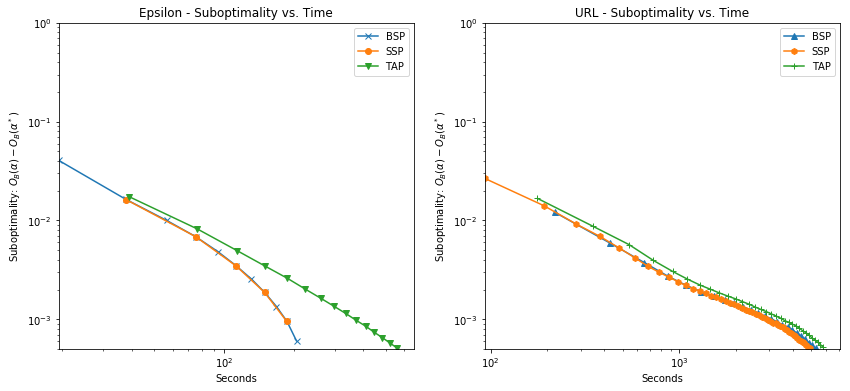

In [24]:
plotter = ExperimentDoubleLogPlotter()
# Epsilon
plotter.add_experiment(
    parser_framework_2.parse(sst_epsilon_framework_bsp, no_params=True),
    subplot=1,
    name="BSP",
    every_n=50,
)
plotter.add_experiment(
    parser_framework_2.parse(sst_epsilon_framework_ssp, no_params=True),
    subplot=1,
    name="SSP",
    every_n=100,
)
plotter.add_experiment(
    parser_framework_2.parse(sst_epsilon_framework_tap, no_params=True),
    subplot=1,
    name="TAP",
    every_n=100,
)
# URL
plotter.add_experiment(
    parser_spark.parse(sst_url_framework_bsp, no_params=True),
    subplot=2,
    name="BSP",
    every_n=100,
)
plotter.add_experiment(
    parser_spark.parse(sst_url_framework_ssp, no_params=True),
    subplot=2,
    name="SSP",
    every_n=50,
)
plotter.add_experiment(
    parser_spark.parse(sst_url_framework_tap, no_params=True),
    subplot=2,
    name="TAP",
    every_n=100,
)

plotter.ylabel(r"Suboptimality: $O_B(\alpha) - O_B(\alpha^*)$")
plotter.ylim(5e-4)
plotter.figsize((14, 6))
plotter.title("Epsilon - Suboptimality vs. Time", subplot=1)
plotter.title("URL - Suboptimality vs. Time", subplot=2)
# plotter.use_iterations()

plotter.add_min_objectives(objective=0.21719526, subplot=1)
plotter.add_min_objectives(objective=0.046094768, subplot=2)

plotter.plot(filename="./../img/sync_strat_cmp.png")

## Merging Strategy

### Figure

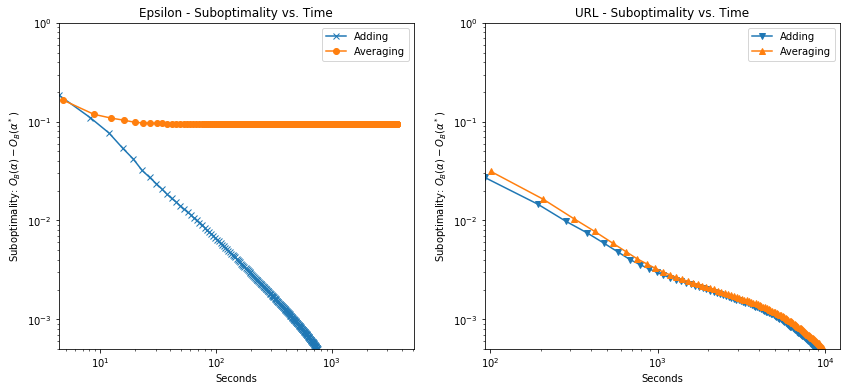

In [27]:
plotter = ExperimentDoubleLogPlotter()
# Epsilon
plotter.add_experiment(
    parser_framework_2.parse(merg_epsilon_add, no_params=True),
    subplot=1,
    name=r"Adding",
    every_n=10,
)
plotter.add_experiment(
    parser_framework_2.parse(merg_epsilon_avg, no_params=True),
    subplot=1,
    name="Averaging",
    every_n=10,
)
# URL
plotter.add_experiment(
    parser_framework_2.parse(merg_url_add, no_params=True),
    subplot=2,
    name="Adding",
    every_n=50,
)
plotter.add_experiment(
    parser_framework_2.parse(merg_url_avg, no_params=True),
    subplot=2,
    name="Averaging",
    every_n=50,
)

plotter.ylabel(r"Suboptimality: $O_B(\alpha) - O_B(\alpha^*)$")
plotter.ylim(5e-4)
plotter.figsize((14, 6))
plotter.title("Epsilon - Suboptimality vs. Time", subplot=1)
plotter.title("URL - Suboptimality vs. Time", subplot=2)
# plotter.use_iterations()

plotter.add_min_objectives(objective=0.21497042, subplot=1)
plotter.add_min_objectives(objective=0.045502, subplot=2)

plotter.plot(filename="./../img/merg_strat_cmp.png")

## Filter Strategy

### Figure

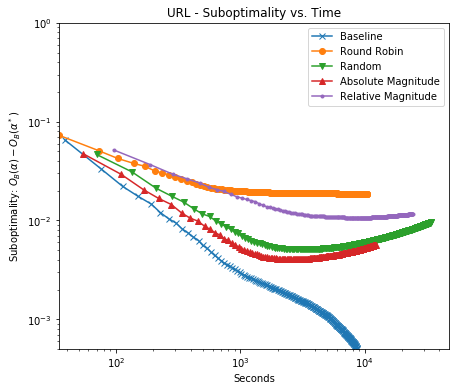

In [29]:
plotter = ExperimentLogPlotter()
# UR
plotter.add_experiment(
    parser_framework_2.parse(filt_url_baseline, no_params=True),
    name="Baseline",
    every_n=20,
)
plotter.add_experiment(
    parser_framework_2.parse(filt_url_rr, no_params=True),
    name="Round Robin",
    every_n=20,
)
plotter.add_experiment(
    parser_framework_2.parse(filt_url_rnd, no_params=True), name="Random", every_n=20
)
plotter.add_experiment(
    parser_framework_2.parse(filt_url_am, no_params=True),
    name="Absolute Magnitude",
    every_n=20,
)
plotter.add_experiment(
    parser_framework_2.parse(filt_url_rm, no_params=True),
    name="Relative Magnitude",
    every_n=20,
)

plotter.ylabel(r"Suboptimality: $O_B(\alpha) - O_B(\alpha^*)$")
plotter.ylim(5e-4)
plotter.figsize((7, 6))
plotter.title("Epsilon - Suboptimality vs. Time")
plotter.title("URL - Suboptimality vs. Time")
# plotter.use_iterations()
plotter.add_min_objective(0.045502)

plotter.plot(filename="./../img/filter_strat_cmp.png")